In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Housing (1).csv")

In [3]:
df.shape

(545, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


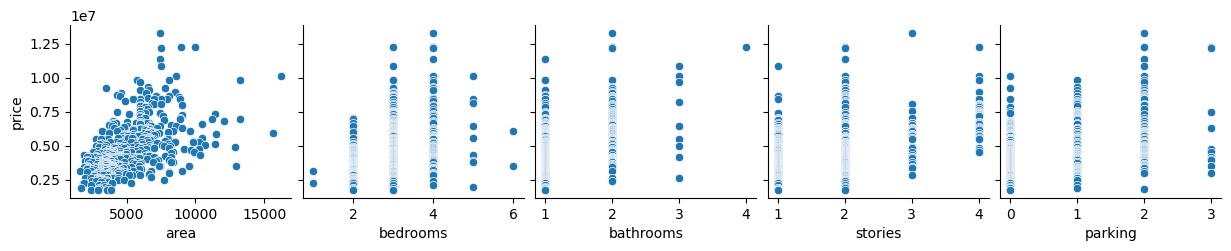

In [6]:
sns.pairplot(data=df,x_vars=['area','bedrooms','bathrooms','stories','parking'],y_vars=['price'])
plt.show()

In [7]:
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [8]:
df.furnishingstatus.nunique()

3

In [9]:
char=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

In [10]:
def mylist(x):
    return x.map({'yes':1,'no':0})

df[char]=df[char].apply(mylist)

In [11]:
dummy=pd.get_dummies(df['furnishingstatus'],drop_first=True).astype(int)
dummy.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [12]:
df=pd.concat([df,dummy],axis=1)

In [13]:
df=df.drop('furnishingstatus',axis=1)

In [14]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [15]:
my=['price','area','bedrooms','bathrooms','stories','parking']

In [16]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=MinMaxScaler()
df[my]=scaler.fit_transform(df[my])

In [17]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,1.000000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,0,0
1,0.909091,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,0,0
2,0.909091,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,1,0
3,0.906061,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,0,0
4,0.836364,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,0,0


In [18]:
X=df.drop('price',axis=1)
y=df['price']

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [20]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()

In [21]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     68.41
Date:                Thu, 12 Dec 2024   Prob (F-statistic):           3.51e-95
Time:                        21:27:18   Log-Likelihood:                 423.49
No. Observations:                 436   AIC:                            -819.0
Df Residuals:                     422   BIC:                            -761.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0224      0.020     

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif[ 'VIF' ] = [variance_inflation_factor(X_train.values, i)for i in range(X_train.shape[1])]
vif[ 'VIF' ] = round(vif[ 'VIF' ], 2)
vif[ 'Features' ] = X_train.columns
vif = vif.sort_values(by= 'VIF' , ascending= False )
vif

,VIF,Features
1,7.72,bedrooms
4,6.28,mainroad
0,4.70,area
3,2.77,stories
11,2.22,semi-furnished
9,2.06,parking
6,2.03,basement
12,1.88,unfurnished
2,1.73,bathrooms
8,1.71,airconditioning


In [23]:
X_1=X_train.drop('semi-furnished',axis=1)

In [24]:
X_train_sm1=sm.add_constant(X_1)

In [25]:
lr1=sm.OLS(y_train,X_train_sm1).fit()

In [26]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     74.13
Date:                Thu, 12 Dec 2024   Prob (F-statistic):           5.36e-96
Time:                        21:27:18   Log-Likelihood:                 423.18
No. Observations:                 436   AIC:                            -820.4
Df Residuals:                     423   BIC:                            -767.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0158      0.018     

In [27]:
vif = pd.DataFrame()
vif['Features'] = X_1.columns
vif['VIF'] = [variance_inflation_factor(X_1.values, i)for i in range(X_1.shape[1])]
vif['VIF'] =round(vif['VIF'],2)
vif = vif.sort_values(by ="VIF", ascending =False)
vif

,Features,VIF
1,bedrooms,6.88
4,mainroad,5.93
0,area,4.70
3,stories,2.77
9,parking,2.06
6,basement,2.03
2,bathrooms,1.72
8,airconditioning,1.70
5,guestroom,1.47
10,prefarea,1.46


In [28]:
X_2=X_1.drop('bedrooms',axis=1)

In [29]:
X_train_sm2=sm.add_constant(X_2)

In [30]:
lr2=sm.OLS(y_train,X_train_sm2).fit()

In [31]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     80.73
Date:                Thu, 12 Dec 2024   Prob (F-statistic):           1.04e-96
Time:                        21:27:18   Log-Likelihood:                 422.58
No. Observations:                 436   AIC:                            -821.2
Df Residuals:                     424   BIC:                            -772.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0282      0.014     

In [32]:
vif = pd.DataFrame()
vif['Features'] = X_2.columns
vif['VIF'] = [variance_inflation_factor(X_2.values, i)for i in range(X_2.shape[1])]
vif['VIF'] =round(vif['VIF'],2)
vif = vif.sort_values(by ="VIF", ascending =False)
vif

,Features,VIF
3,mainroad,5.07
0,area,4.51
2,stories,2.30
8,parking,2.04
5,basement,1.88
7,airconditioning,1.70
1,bathrooms,1.64
4,guestroom,1.47
9,prefarea,1.46
10,unfurnished,1.35


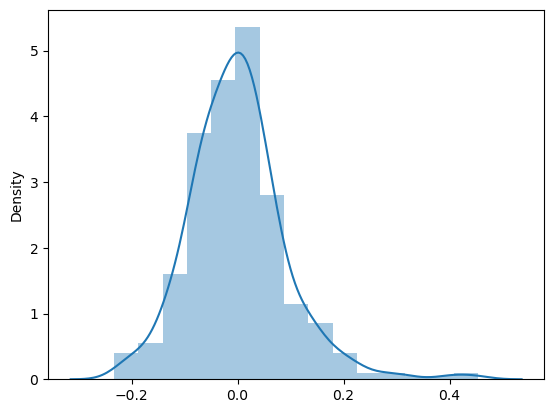

In [33]:
y_train_pred =lr2.predict(X_train_sm2)
residual = (y_train - y_train_pred)
sns.distplot(residual, bins = 15)
plt.show()

In [34]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [35]:
data=pd.read_csv("advertising.csv")
data.head(14)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [36]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


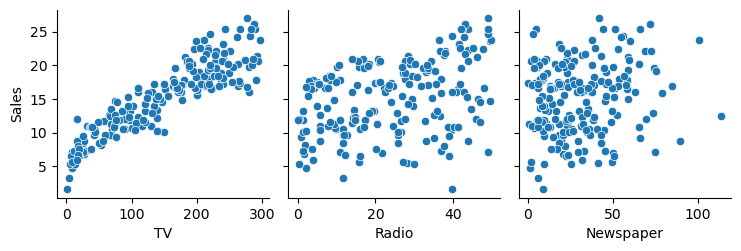

In [37]:
sns.pairplot(data=data,x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'])
plt.show()

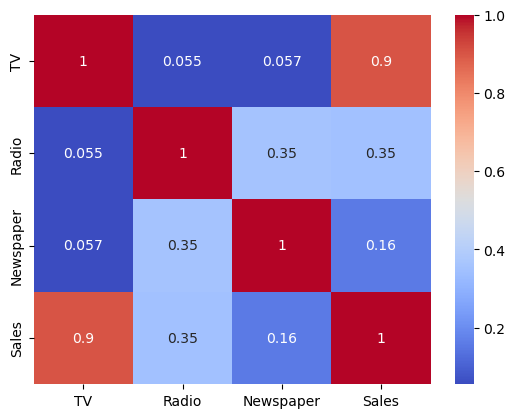

In [38]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.show()

In [39]:
num=['TV','Sales','Radio','Newspaper']

In [40]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler=MinMaxScaler()
data[num]=scaler.fit_transform(data[num])
data.head()

,TV,Radio,Newspaper,Sales
0,0.775786,0.762097,0.605981,0.807087
1,0.148123,0.792339,0.394019,0.346457
2,0.055800,0.925403,0.606860,0.409449
3,0.509976,0.832661,0.511873,0.586614
4,0.609063,0.217742,0.510994,0.641732


In [41]:
# lets build model
X_1=data[['TV','Radio','Newspaper']]
y_1=data['Sales']

In [42]:
from sklearn.model_selection import train_test_split 
X_train_1,X_test_1,y_train_1,y_test_1=train_test_split(X_1,y_1,test_size=0.2,random_state=50)


In [43]:
import statsmodels.api as sm
X_train_1_sm=sm.add_constant(X_train_1)
#ordinary least Square
lr=sm.OLS(y_train_1,X_train_1_sm).fit()

In [44]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     478.6
Date:                Thu, 12 Dec 2024   Prob (F-statistic):           1.98e-78
Time:                        21:27:19   Log-Likelihood:                 203.44
No. Observations:                 160   AIC:                            -398.9
Df Residuals:                     156   BIC:                            -386.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1162      0.014      8.302      0.0

In [45]:
# Newspaper has p value so dropping

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif[ 'VIF' ] = [variance_inflation_factor(X_train_1.values, i)for i in range(X_train_1.shape[1])]
vif[ 'VIF' ] = round(vif[ 'VIF' ], 2)
vif[ 'Features' ] = X_train_1.columns
vif = vif.sort_values(by= 'VIF' , ascending= False )
vif

,VIF,Features
1,3.42,Radio
2,3.04,Newspaper
0,2.56,TV


In [47]:
x1=X_train_1_sm.drop('Newspaper',axis=1)

In [48]:
X_train_sm=sm.add_constant(x1)
#ordinary least Square
lr1=sm.OLS(y_train_1,X_train_1_sm).fit()

In [49]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     478.6
Date:                Thu, 12 Dec 2024   Prob (F-statistic):           1.98e-78
Time:                        21:27:19   Log-Likelihood:                 203.44
No. Observations:                 160   AIC:                            -398.9
Df Residuals:                     156   BIC:                            -386.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1162      0.014      8.302      0.0

In [50]:
y_pred=lr1.predict(X_train_1_sm)
y_pred.head(10)

170    0.273126
183    0.924452
38     0.322205
153    0.653174
40     0.649262
190    0.367718
177    0.521130
131    0.708518
13     0.357954
121    0.251903
dtype: float64

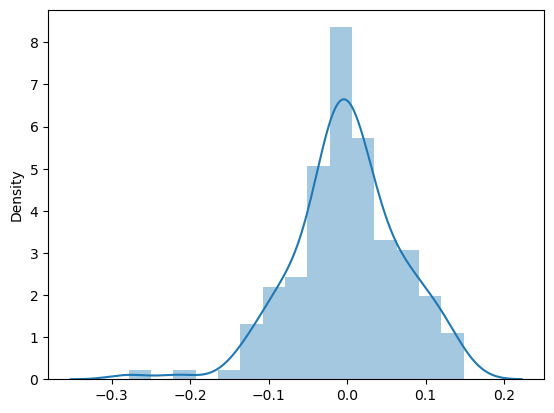

In [51]:
residual = (y_train_1-y_pred)
sns.distplot(residual, bins = 15)
plt.show()

In [52]:
X_test_1_sm=sm.add_constant(X_test_1)
y_test_pred=lr1.predict(X_test_1_sm)

In [53]:
y_test_pred.head(10)

112    0.558220
165    0.651167
12     0.319680
73     0.423525
144    0.389736
20     0.709334
199    0.653992
8      0.141930
39     0.766986
88     0.421871
dtype: float64

In [54]:
from sklearn.metrics import r2_score

In [55]:
r2=r2_score(y_test_1,y_test_pred)
r2

0.9006409689782178